<a href="https://colab.research.google.com/github/dcolbourne/Colab/blob/TensorFlow/neuralnetworkregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a a regression problem but in our case, wer're goign to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating some data to view and fit


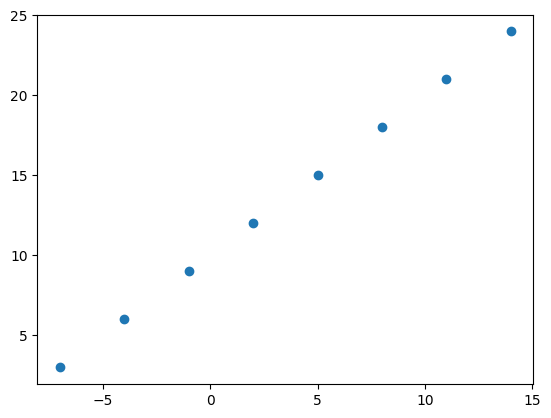

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lablels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [4]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [5]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [6]:
# Create a demo tensor for our housing price predcition problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([93700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([93700], dtype=int32)>)

In [7]:
X[0], Y[0]

(-7.0, 3.0)

In [8]:
X[1], Y[1]

(-4.0, 6.0)

In [9]:
input_shape = X[0].shape
output_shape =Y[0].shape
input_shape, output_shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], Y[0]

(-7.0, 3.0)

Fix
If you're running TensorFlow 2.7.0+ and you're passing a vector to a model, you need to expand its dimensions.

## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+

## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line
The code adds an extra dimension to X on the last axis, turning it ndim=1 to ndim=2 (what the model requires).

In [17]:
# Turn our NumPy arrays in tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape =Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

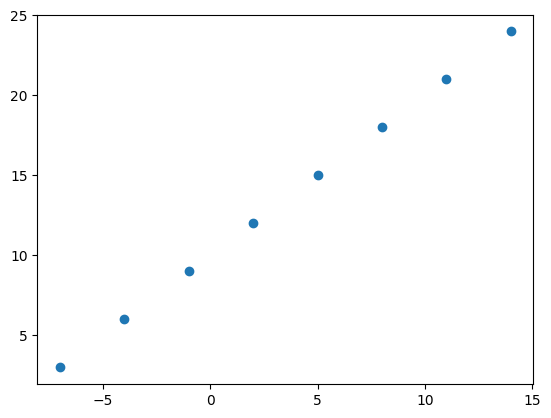

In [18]:
plt.scatter(X,Y)

## Steps in modelling with TensorFlow

1. **Creating a model**- define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find pattern between X & Y (features and labels).


In [44]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a mdoel using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae, # MAE Mean Absolute Error
               optimizer=tf.keras.optimizers.SGD(), # SGD is short for Stohastic Gradient Descent
               metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - MAE: 9.9245 - loss: 9.9245
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - MAE: 9.7920 - loss: 9.7920
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - MAE: 9.6595 - loss: 9.6595
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - MAE: 9.5270 - loss: 9.5270
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 9.3945 - loss: 9.3945


In [25]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [45]:
# Try and make a prection with our trained model
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[20.391874]], dtype=float32)

In [46]:
Y_pred

array([[20.391874]], dtype=float32)

In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a mdoel using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae, # MAE Mean Absolute Error
               optimizer=tf.keras.optimizers.SGD(), # SGD is short for Stohastic Gradient Descent
               metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - MAE: 12.3935 - loss: 12.3935
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 12.2610 - loss: 12.2610
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - MAE: 12.1285 - loss: 12.1285
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - MAE: 11.9960 - loss: 11.9960
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 11.8635 - loss: 11.8635
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 11.7310 - loss: 11.7310
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - MAE: 11.5985 - loss: 11.5985
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 11.4660 - loss: 11.4660
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 11.3335 - loss: 11.3335
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - MAE: 11.2010 - loss: 11.2010
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - MAE: 11.0685 - loss: 11.0685
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - MAE: 10.9360 - loss: 10.9360
Epoch 13/100
1/1 ━━━━━━━

In [49]:
# Try and make a prection with our trained model
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[30.024319]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create the model.

1. **Creating a model** Here we can add more layers, increase the number of hidden units (all called nuerons) within each of the hidden layers, change the activation funciton of each layer.
2. **Compiling a model** - Here we can change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more date (give the model more examples to learn from).

In [50]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step - MAE: 16.4896 - loss: 16.4896
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 16.2083 - loss: 16.2083
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 15.9271 - loss: 15.9271
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 15.6458 - loss: 15.6458
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 15.3646 - loss: 15.3646
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - MAE: 15.0833 - loss: 15.0833
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 14.8456 - loss: 14.8456
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 14.7131 - loss: 14.7131
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 14.5806 - loss: 14.5806
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 14.4481 - loss: 14.4481
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 14.3156 - loss: 14.3156
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - MAE: 14.1831 - loss: 14.1831
Epoch 13/100
1/1 ━━━━━━━

In [51]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[29.845827]], dtype=float32)

In [55]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step - MAE: 14.9972 - loss: 14.9972
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - MAE: 14.5472 - loss: 14.5472
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 14.0972 - loss: 14.0972
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - MAE: 13.6472 - loss: 13.6472
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - MAE: 13.1972 - loss: 13.1972
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - MAE: 12.7472 - loss: 12.7472
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - MAE: 12.2972 - loss: 12.2972
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 11.8472 - loss: 11.8472
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 11.3972 - loss: 11.3972
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 10.9472 - loss: 10.9472
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 10.4972 - loss: 10.4972
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 10.0472 - loss: 10.0472
Epoch 13/100
1/1 ━━━━━━

In [56]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[27.657806]], dtype=float32)

In [62]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation="linear"))


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - MAE: 8.5421 - loss: 8.5421
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 8.0921 - loss: 8.0921
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 7.6421 - loss: 7.6421
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - MAE: 7.2750 - loss: 7.2750
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - MAE: 7.2013 - loss: 7.2013
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - MAE: 7.1383 - loss: 7.1383
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - MAE: 7.1813 - loss: 7.1813
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - MAE: 7.1549 - loss: 7.1549
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 7.0771 - loss: 7.0771
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 6.9601 - loss: 6.9601
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 6.8122 - loss: 6.8122
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 6.7242 - loss: 6.7242
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/st

In [63]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[27.088734]], dtype=float32)

In [67]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step - MAE: 13.6178 - loss: 13.6178
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - MAE: 7.6155 - loss: 7.6155
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 5.3409 - loss: 5.3409
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 5.2867 - loss: 5.2867
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 3.8328 - loss: 3.8328
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 4.6340 - loss: 4.6340
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 3.9990 - loss: 3.9990
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - MAE: 3.5152 - loss: 3.5152
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - MAE: 3.8372 - loss: 3.8372
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 3.2056 - loss: 3.2056
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - MAE: 2.8644 - loss: 2.8644
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 2.3646 - loss: 2.3646
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/

In [68]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[25.839]], dtype=float32)

In [69]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - MAE: 14.1019 - loss: 14.1019
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - MAE: 8.5305 - loss: 8.5305
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 7.0309 - loss: 7.0309
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 5.3770 - loss: 5.3770
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 7.3622 - loss: 7.3622
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 5.6628 - loss: 5.6628
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 3.2864 - loss: 3.2864
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - MAE: 3.0407 - loss: 3.0407
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - MAE: 0.6805 - loss: 0.6805
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - MAE: 3.9331 - loss: 3.9331
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - MAE: 4.9530 - loss: 4.9530
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 2.9304 - loss: 2.9304
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/ste

In [70]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[28.867083]], dtype=float32)

In [71]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="linear"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - MAE: 13.7693 - loss: 13.7693
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 11.1904 - loss: 11.1904
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - MAE: 8.3779 - loss: 8.3779
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - MAE: 6.8953 - loss: 6.8953
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - MAE: 7.9698 - loss: 7.9698
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 7.2266 - loss: 7.2266
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 5.8793 - loss: 5.8793
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - MAE: 5.8235 - loss: 5.8235
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 5.9761 - loss: 5.9761
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - MAE: 5.4442 - loss: 5.4442
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - MAE: 4.3615 - loss: 4.3615
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 4.2077 - loss: 4.2077
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/

In [72]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[24.989386]], dtype=float32)

In [73]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step - MAE: 19.4185 - loss: 19.4185
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 18.8185 - loss: 18.8185
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 18.2185 - loss: 18.2185
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 17.6185 - loss: 17.6185
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 17.0185 - loss: 17.0185
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 16.4185 - loss: 16.4185
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - MAE: 15.8185 - loss: 15.8185
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - MAE: 15.2185 - loss: 15.2185
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 14.6185 - loss: 14.6185
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 14.0186 - loss: 14.0186
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 13.4457 - loss: 13.4457
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 13.0026 - loss: 13.0026
Epoch 13/100
1/1 ━━━━━━━

In [74]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[27.54195]], dtype=float32)

In [76]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=150)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step - MAE: 14.6044 - loss: 14.6044
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 14.1544 - loss: 14.1544
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 13.7044 - loss: 13.7044
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 13.2544 - loss: 13.2544
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - MAE: 12.8044 - loss: 12.8044
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - MAE: 12.3544 - loss: 12.3544
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 11.9044 - loss: 11.9044
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - MAE: 11.4544 - loss: 11.4544
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 11.0044 - loss: 11.0044
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 10.5544 - loss: 10.5544
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - MAE: 10.1044 - loss: 10.1044
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - MAE: 9.6544 - loss: 9.6544
Epoch 13/150
1/1 ━━━━━━━━━

In [77]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[26.53769]], dtype=float32)

In [78]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="linear"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=150)


Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MAE: 14.4218 - loss: 14.4218
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 7.4252 - loss: 7.4252
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 13.8476 - loss: 13.8476
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 11.0702 - loss: 11.0702
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 6.2456 - loss: 6.2456
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 8.8111 - loss: 8.8111
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - MAE: 9.7659 - loss: 9.7659
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 8.9387 - loss: 8.9387
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 7.0218 - loss: 7.0218
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - MAE: 4.3484 - loss: 4.3484
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 3.6700 - loss: 3.6700
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 4.5900 - loss: 4.5900
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms

In [79]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="linear"),
    tf.keras.layers.Dense(1)
])


# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MAE: 13.0319 - loss: 13.0319
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 12.3616 - loss: 12.3616
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 11.6860 - loss: 11.6860
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 11.0032 - loss: 11.0032
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - MAE: 10.3107 - loss: 10.3107
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 9.6071 - loss: 9.6071
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 8.8906 - loss: 8.8906
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - MAE: 8.1595 - loss: 8.1595
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - MAE: 7.4114 - loss: 7.4114
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - MAE: 6.8484 - loss: 6.8484
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 6.9353 - loss: 6.9353
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 7.2174 - loss: 7.2174
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [82]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the mode
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["MAE"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - MAE: 13.6414 - loss: 13.6414
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 13.1914 - loss: 13.1914
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 12.7414 - loss: 12.7414
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 12.2914 - loss: 12.2914
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 11.8414 - loss: 11.8414
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 11.3914 - loss: 11.3914
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 10.9414 - loss: 10.9414
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 10.4914 - loss: 10.4914
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - MAE: 10.0414 - loss: 10.0414
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - MAE: 9.5914 - loss: 9.5914
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - MAE: 9.1414 - loss: 9.1414
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - MAE: 8.6914 - loss: 8.6914
Epoch 13/200
1/1 ━━━━━━━━━━━━━

In [83]:
new_value = tf.constant([17.0])

Y_pred = model.predict(new_value)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[27.33702]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neuaral networks is:

Build a model > fit it > tweak a model > fit it > evaluate it > tweak a model > fit it > evaluate it....

When it comes to evalution.... there are 3 words you should memorize:

"Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with - what does it look like?
* The training of a model - how do the predictions of a model change as the model trains?
* The model itself - how does the model make predictions?

In [84]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [86]:
# Make labels for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

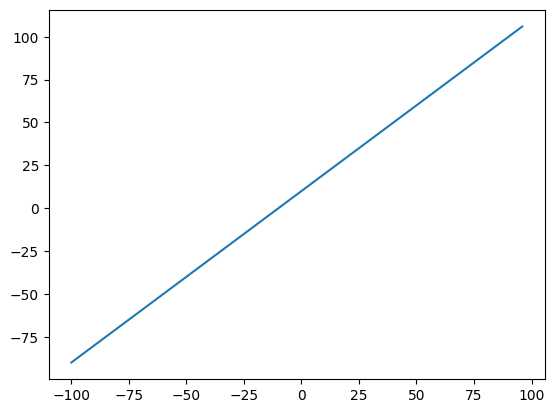

In [87]:
# Visualize the data
plt.plot(X,Y)

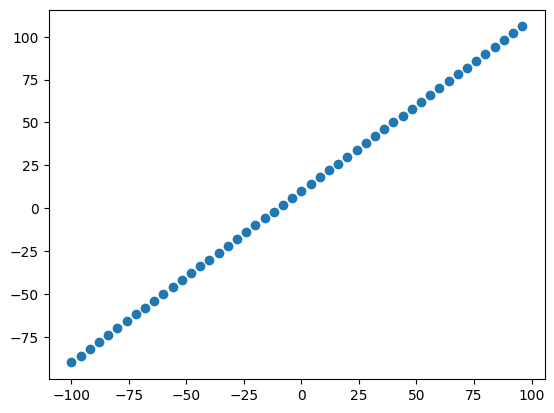

In [90]:
plt.scatter(X,Y)

In [91]:
# Turn our NumPy arrays in tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

### The 2 sets of data 80% Training 20% Test set